In [3]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('shopee_expressID.csv')
#only keep caption column 
df1 = df[['caption']]
df1 = df1.dropna()

In [6]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [7]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_49495/1854476216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'][i] = review.replace('0', row['caption'])


In [8]:
df1 = df1.rename(columns={'reviews': 'Shopee ID Reviews'})
df1

,index,caption,middle,Shopee ID Reviews
0,0,Lemot banget Sudah 3 hari diam dtmpt padahal j...,NaN,Lemot banget Sudah 3 hari diam dtmpt padahal j...
1,2,"di shopee paket telah diterima oleh saya, pada...",NaN,"di shopee paket telah diterima oleh saya, pada..."
2,3,Ini jasa kirim yg buruk banget!! Kmrn tb2 ada ...,NaN,Ini jasa kirim yg buruk banget!! Kmrn tb2 ada ...
3,4,Kurir gk jelas...paket blm di kirim tpi di apl...,NaN,Kurir gk jelas...paket blm di kirim tpi di apl...
4,6,(Translated by Google) I swear this is really ...,"I swear this is really slow motion, lol, gjls...","I swear this is really slow motion, lol, gjls"
...,...,...,...,...
180,242,(Translated by Google) It & amp; # 39; s nice ...,It & amp; # 39; s nice to shop with a free sh...,It & amp; # 39; s nice to shop with a free sh...
181,243,(Translated by Google) Shopee ... Shopee ... ...,Shopee ... Shopee ... (Original,Shopee ... Shopee ...
182,244,"(Translated by Google) Indeed, the delivery sp...","Indeed, the delivery speed is super fast, the...","Indeed, the delivery speed is super fast, the..."
183,245,"(Translated by Google) Fast delivery, Please s...","Fast delivery, Please select shopee exoress ...","Fast delivery, Please select shopee exoress"


In [9]:
df1['Shopee ID Reviews'].to_csv('IDshopee.csv')

### Run 2nd csv

In [10]:
df2 = pd.read_csv('shopee_expressID2.csv')

In [11]:
df2 = df2[['caption']]

df2 = df2.dropna()

df2['middle'] = df2['caption'].str.split(")").str[1]

df2['reviews'] = df2['middle'].str.split("(").str[0]

In [12]:
df2 = df2.reset_index()

df2['reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['reviews']

    if review == '0':
        df2['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_49495/2674474058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i] = review.replace('0', row['caption'])


In [13]:
df2 = df2.rename(columns={'reviews': 'Shopee ID Reviews'})
df2['Shopee ID Reviews'].to_csv('IDshopee2.csv')

### Combining files together 

In [14]:
files = os.path.join("IDshopee**.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_shopeeid.csv")

### Clean the data

In [15]:
df_combi = pd.read_csv('combined_shopeeid.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['clean_1'] = pd.DataFrame(df_combi['Shopee ID Reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,Unnamed: 0.1,Shopee ID Reviews,clean_1
0,0,0,"Shope expres tai, barang saya bisa ilang gitu ...",shope expres tai barang saya bisa ilang gitu g...
1,1,1,Ngga ada pergerakan selama sehari padahal udah...,ngga ada pergerakan selama sehari padahal udah...
2,2,2,"Lama banget di gudang dc bandung, paket saya d...",lama banget di gudang dc bandung paket saya di...
3,3,3,Lilaaaaaaaa barg mau d pake hari ini g sampe2....,lilaaaaaaaa barg mau pake hari ini g boasanya ...
4,4,4,"Kacaauu ,, kurir nyaa ga amanah",kacaauu kurir nyaa ga amanah
...,...,...,...,...
909,909,180,It & amp; # 39; s nice to shop with a free sh...,amp nice shop free shopee shipping tissue ...
910,910,181,Shopee ... Shopee ...,shopee shopee
911,911,182,"Indeed, the delivery speed is super fast, the...",indeed delivery speed super fast goods scratch...
912,912,183,"Fast delivery, Please select shopee exoress",fast delivery please select shopee exoress


### Sentiment analysis 


In [16]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['clean_2'] = pd.DataFrame(df_combi['clean_1'].apply(clean_text_round2))


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['Shopee ID Reviews'].apply(sentiment_scores))

In [18]:
df_combi

,Unnamed: 0,Unnamed: 0.1,Shopee ID Reviews,clean_1,clean_2,sentiment
0,0,0,"Shope expres tai, barang saya bisa ilang gitu ...",shope expres tai barang saya bisa ilang gitu g...,shope expres tai barang saya bisa ilang gitu g...,Neutral
1,1,1,Ngga ada pergerakan selama sehari padahal udah...,ngga ada pergerakan selama sehari padahal udah...,ngga ada pergerakan selama sehari padahal udah...,Neutral
2,2,2,"Lama banget di gudang dc bandung, paket saya d...",lama banget di gudang dc bandung paket saya di...,lama banget di gudang dc bandung paket saya di...,Neutral
3,3,3,Lilaaaaaaaa barg mau d pake hari ini g sampe2....,lilaaaaaaaa barg mau pake hari ini g boasanya ...,lilaaaaaaaa barg mau pake hari ini g boasanya ...,Neutral
4,4,4,"Kacaauu ,, kurir nyaa ga amanah",kacaauu kurir nyaa ga amanah,kacaauu kurir nyaa ga amanah,Neutral
...,...,...,...,...,...,...
909,909,180,It & amp; # 39; s nice to shop with a free sh...,amp nice shop free shopee shipping tissue ...,amp nice shop free shopee shipping tissue ...,Positive
910,910,181,Shopee ... Shopee ...,shopee shopee,shopee shopee,Neutral
911,911,182,"Indeed, the delivery speed is super fast, the...",indeed delivery speed super fast goods scratch...,indeed delivery speed super fast good scratche...,Positive
912,912,183,"Fast delivery, Please select shopee exoress",fast delivery please select shopee exoress,fast delivery please select shopee exoress,Positive


In [20]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg = df_neg[['clean_2']]
df_neg

,clean_2
7,courier initial confirmation package put carel...
9,bad choose minus minus star value choose minus...
10,better delete courier expedition shopee shame ...
11,worst shipping service expedition archipelago ...
13,status received even though item received phot...
...,...
891,slow send time failed padhal house easy find ...
896,long delivery delivery still within city day f...
897,recommended really slow
900,using shopee xpress condition received packagi...


In [21]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['clean_2'].str.cat(sep=' ')

In [22]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 303),
 ('package', 147),
 ('courier', 99),
 ('shopee', 99),
 ('bad', 92),
 ('day', 90),
 ('delivery', 89),
 ('really', 76),
 ('time', 75),
 ('arrived', 75),
 ('received', 74),
 ('express', 73),
 ('even', 65),
 ('good', 60),
 ('long', 59),
 ('item', 57),
 ('service', 56),
 ('sent', 54),
 ('bandung', 52),
 ('though', 51),
 ('expedition', 47),
 ('dont', 46),
 ('status', 44),
 ('use', 37),
 ('didnt', 37),
 ('want', 33),
 ('using', 33),
 ('one', 32),
 ('disappointed', 31),
 ('hasnt', 31),
 ('come', 26),
 ('address', 26),
 ('send', 25),
 ('doesnt', 24),
 ('arrive', 24),
 ('take', 24),
 ('still', 24),
 ('like', 22),
 ('failed', 22),
 ('week', 20),
 ('yet', 20),
 ('slow', 20),
 ('im', 19),
 ('know', 19),
 ('first', 18),
 ('call', 18),
 ('house', 17),
 ('clear', 17),
 ('please', 17),
 ('said', 17),
 ('name', 17),
 ('havent', 17),
 ('already', 17),
 ('stuck', 16),
 ('also', 16),
 ('order', 16),
 ('number', 15),
 ('sorry', 15),
 ('hub', 15),
 ('choose', 14),
 ('night', 14),
 ('crazy', 14

In [27]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use', 'hasnt','doesnt']
stop_words = add_stop_words + stop 

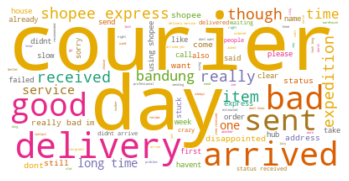

In [28]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

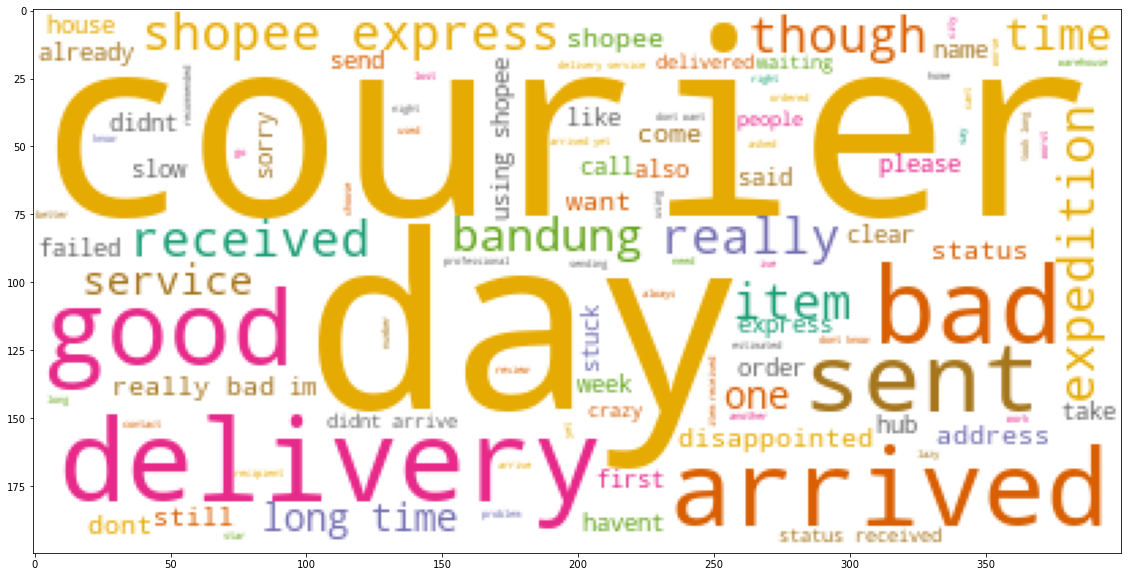

In [29]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [30]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['clean_2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'clean_2':'Late reviews'})

In [31]:
df_late

,Late reviews
14,im really lazy shopee express forget dont repl...
21,long stupid courier
37,review negative huh ive using shopee express l...
39,wow package bandung makassar sent yet keep lon...
49,delivery slow shopee customer service asking w...
...,...
887,package delivery long recommended
891,slow send time failed padhal house easy find ...
896,long delivery delivery still within city day f...
897,recommended really slow


In [32]:
df_late.to_csv('Late_reviews_shopeeID.csv')